In [1]:
pip install julian

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.table import Table
from astropy.time import Time
from astropy.timeseries import TimeSeries
import glob
import julian
import datetime


%matplotlib inline

In [35]:
file_list = glob.glob('E:\Astronomy\Cepheids\Ceph_fits\*.*')
file_list

['E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.76992.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.79772.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.82012.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.84782.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.87572.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.90352.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451890.97072.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.31132.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.35292.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.35562.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.39872.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.48952.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.52842.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.57602.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ceph_2451891.58152.fits',
 'E:\\Astronomy\\Cepheids\\Ceph_fits\\ce

In [36]:
hdul = []
for file in glob.glob('E:\Astronomy\Cepheids\Ceph_fits\*.*'):
    fits_data = astropy.io.fits.open(file)
    hdul.append(fits_data)
hdul

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001628A78FD90>],

In [37]:
for i in range(len(hdul)):
    file_info = hdul[i].info()
file_info        

Filename: E:\Astronomy\Cepheids\Ceph_fits\ceph_2451890.76992.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (201, 201)   int16   
Filename: E:\Astronomy\Cepheids\Ceph_fits\ceph_2451890.79772.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (201, 201)   int16   
Filename: E:\Astronomy\Cepheids\Ceph_fits\ceph_2451890.82012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (201, 201)   int16   
Filename: E:\Astronomy\Cepheids\Ceph_fits\ceph_2451890.84782.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (201, 201)   int16   
Filename: E:\Astronomy\Cepheids\Ceph_fits\ceph_2451890.87572.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (201, 201)   int16   
Filename: E:\Astronomy\Cepheids\Ceph_fit

In [38]:
time = [2451890.76992, 2451890.79772, 2451890.82012, 2451890.84782, 2451890.87572, 2451890.90352, 2451890.97072, 2451891.31132, 
        2451891.35292, 2451891.35562, 2451891.39872, 2451891.48952, 2451891.52842, 2451891.57602, 2451891.58152, 2451891.60222,
        2451891.65752, 2451891.70262, 2451891.79442, 2451891.85352, 2451891.95302, 2451892.07922, 2451892.20992, 2451892.22072, 
        2451892.31292, 2451892.33302, 2451892.36322, 2451892.40822, 2451892.42502, 2451892.45792, 2451892.50102, 2451892.51062, 
        2451892.55862, 2451892.60052, 2451892.65112, 2451892.70082, 2451892.74812, 2451892.76252, 2451892.79032, 2451892.80662, 
        2451892.83432, 2451892.96242, 2451893.27562, 2451893.29662, 2451893.36262, 2451893.50272, 2451893.57792, 2451893.79002, 
        2451893.81212, 2451893.87432, 2451893.90232, 2451893.93322, 2451893.96102, 2451894.02092, 2451894.10662, 2451894.15472, 
        2451894.24292, 2451894.24342, 2451894.29762, 2451894.33802, 2451894.35312, 2451894.39752, 2451894.41982, 2451894.42192, 
        2451894.50682, 2451894.54652, 2451894.59672, 2451894.64542]
for j in range(len(time)):
    t = Time(time[j], format = 'jd')
    t.format = 'fits'
    print(t)

2000-12-12T06:28:41.088
2000-12-12T07:08:43.008
2000-12-12T07:40:58.368
2000-12-12T08:20:51.648
2000-12-12T09:01:02.208
2000-12-12T09:41:04.128
2000-12-12T11:17:50.208
2000-12-12T19:28:18.048
2000-12-12T20:28:12.288
2000-12-12T20:32:05.568
2000-12-12T21:34:09.408
2000-12-12T23:44:54.528
2000-12-13T00:40:55.488
2000-12-13T01:49:28.128
2000-12-13T01:57:23.328
2000-12-13T02:27:11.808
2000-12-13T03:46:49.728
2000-12-13T04:51:46.368
2000-12-13T07:03:57.888
2000-12-13T08:29:04.128
2000-12-13T10:52:20.928
2000-12-13T13:54:04.608
2000-12-13T17:02:17.088
2000-12-13T17:17:50.208
2000-12-13T19:30:36.288
2000-12-13T19:59:32.928
2000-12-13T20:43:02.208
2000-12-13T21:47:50.208
2000-12-13T22:12:01.728
2000-12-13T22:59:24.288
2000-12-14T00:01:28.128
2000-12-14T00:15:17.568
2000-12-14T01:24:24.768
2000-12-14T02:24:44.928
2000-12-14T03:37:36.768
2000-12-14T04:49:10.848
2000-12-14T05:57:17.568
2000-12-14T06:18:01.728
2000-12-14T06:58:03.648
2000-12-14T07:21:31.968
2000-12-14T08:01:25.248
2000-12-14T11:05

In [39]:
for k in range(len(hdul)):
    header_data = hdul[k]
    w = WCS(header_data[0].header)

 [astropy.io.fits.verify]
Changed DATE-OBS from '24/01/2001' to '2001-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/01/2001' to '2001-01-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/02/2001' to '2001-02-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/02/2001' to '2001-02-05''. [astropy.wcs.wcs]
Changed DATE-OBS from '17/12/2000' to '2000-12-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/12/2000' to '2000-12-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/12/2000' to '2000-12-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '25/12/2000' to '2000-12-25''. [astropy.wcs.wcs]
Changed DATE-OBS from '02/01/2001' to '2001-01-02''. [astropy.wcs.wcs]
Changed DATE-OBS from '09/01/2001' to '2001-01-09''. [astropy.wcs.wcs]
Changed DATE-OBS from '06/01/2001' to '2001-01-06''. [astropy.wcs.wcs]
Changed DATE-OBS from '13/01/2001' to '2001-01-13''. [astropy.wcs.wcs]
Changed DATE-OBS from '10/01/2001' to '2001-01-10''. [astropy.wcs.wcs]
Changed DATE-OBS from '14/01/2001' to '2001-01-14''

In [40]:
image_data = []
for a in range(len(hdul)):
    data_file = hdul[a]
    image = np.asarray(data_file[0].data)
    image_data.append(image)
image_data

[array([[ 3038,  3931,  5329, ...,  2435,  2346,  2468],
        [ 3527,  5535,  8729, ...,  2392,  2391,  2401],
        [ 4062,  7714, 14202, ...,  2396,  2441,  2530],
        ...,
        [ 2668,  2776,  2592, ...,  2358,  2348,  2351],
        [ 2545,  2525,  2493, ...,  2325,  2288,  2444],
        [ 2413,  2325,  2409, ...,  2407,  2376,  2328]], dtype=int16),
 array([[ 2891,  3777,  5880, ...,  2324,  2307,  2337],
        [ 3115,  4774,  9008, ...,  2260,  2305,  2346],
        [ 3331,  5618, 12935, ...,  2275,  2265,  2373],
        ...,
        [ 2393,  2502,  2523, ...,  2252,  2304,  2302],
        [ 2327,  2326,  2381, ...,  2285,  2292,  2255],
        [ 2350,  2311,  2290, ...,  2355,  2356,  2301]], dtype=int16),
 array([[ 4071,  4560,  5579, ...,  3280,  3301,  3342],
        [ 4527,  6124,  8661, ...,  3164,  3201,  3243],
        [ 5156,  8300, 14015, ...,  3256,  3235,  3360],
        ...,
        [ 3505,  3546,  3511, ...,  3247,  3286,  3203],
        [ 3394,  33

In [41]:
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry

In [42]:
positions = [(101. , 101.) , (103.5 , 172.5) , (161.25 , 100)]
aperture = CircularAperture(positions, r=3)

In [43]:
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    87692.749
  2   103.5   172.5    165550.24
  3  161.25   100.0    72165.471
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    85090.314
  2   103.5   172.5    158505.94
  3  161.25   100.0     69133.56
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    110263.17
  2   103.5   172.5    179305.75
  3  161.25   100.0    95986.155
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0     110256.4
  2   103.5   172.5     182796.3
  3  161.25   100.0    95484.263
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    103402.66
  2   103.5   172.5    163895.34
  3  161.25   100.0    90610.392
 id xcente

In [44]:
positions = [(101. , 101.) , (103.5 , 172.5) , (161.25 , 100)]
annulus_aperture = CircularAnnulus(positions, r_in = 6, r_out = 10)

In [45]:
annulus_masks = annulus_aperture.to_mask(method = 'center')

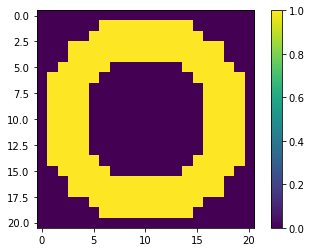

In [46]:
plt.imshow(annulus_masks[0], interpolation = 'nearest')
plt.colorbar()

In [47]:
from astropy.stats import sigma_clipped_stats

In [63]:
bkg_median = []
data = image_data
for d in range(len(image_data)):
    median_value  = []
    for mask in annulus_masks:
        annulus_data = mask.multiply(data[d])
        annulus_data1d = annulus_data[mask.data > 0]
        _, median_sigclip, _ = sigma_clipped_stats(annulus_data1d)
        median_value.append(median_sigclip)
        bkg_median.append(median_sigclip)
print(bkg_median)

[2401.0, 2387.0, 2362.5, 2322.0, 2323.0, 2284.0, 3262.0, 3248.0, 3218.0, 3253.0, 3251.0, 3218.0, 3114.0, 3099.0, 3061.0, 3100.5, 3089.5, 3060.0, 7425.0, 7426.0, 7398.0, 3001.0, 2974.5, 2952.0, 1747.0, 1742.5, 1684.0, 2430.5, 2417.5, 2377.0, 1516.5, 1510.0, 1477.0, 2876.0, 2863.0, 2827.5, 5250.0, 5252.5, 5181.0, 6422.0, 6416.5, 6372.0, 1604.5, 1584.0, 1560.0, 7362.0, 7357.5, 7314.5, 1732.5, 1736.0, 1708.0, 1843.0, 1837.5, 1795.0, 2448.0, 2440.0, 2414.0, 3478.0, 3492.0, 3431.5, 5433.0, 5449.5, 5386.5, 2873.5, 2861.0, 2823.0, 2310.0, 2304.0, 2264.5, 1735.0, 1730.0, 1717.0, 2156.0, 2148.0, 2133.0, 2961.5, 2961.0, 2920.0, 3542.0, 3541.0, 3499.0, 3104.0, 3082.0, 3042.0, 3168.0, 3160.0, 3134.0, 3815.0, 3811.0, 3746.0, 3321.0, 3310.0, 3291.0, 2913.0, 2902.0, 2868.0, 5949.0, 5973.0, 5907.0, 5467.0, 5440.0, 5426.0, 1987.0, 1990.0, 1926.0, 1961.0, 1957.0, 1922.0, 2093.0, 2080.5, 2051.0, 2481.5, 2468.0, 2435.0, 2611.5, 2597.5, 2557.5, 2515.0, 2501.0, 2468.0, 2464.0, 2448.0, 2421.0, 8152.0, 8139.0,

In [49]:
bkg_median_list = []
buffer = []
g = 3
h = 68
for i in range(h):
    for j in range(g):
        pos = j + i * g
        buffer.append(bkg_median[pos])
    bkg_median_list.append(list(buffer))
    buffer.clear()
print(bkg_median_list)

[[2401.0, 2387.0, 2362.5], [2322.0, 2323.0, 2284.0], [3262.0, 3248.0, 3218.0], [3253.0, 3251.0, 3218.0], [3114.0, 3099.0, 3061.0], [3100.5, 3089.5, 3060.0], [7425.0, 7426.0, 7398.0], [3001.0, 2974.5, 2952.0], [1747.0, 1742.5, 1684.0], [2430.5, 2417.5, 2377.0], [1516.5, 1510.0, 1477.0], [2876.0, 2863.0, 2827.5], [5250.0, 5252.5, 5181.0], [6422.0, 6416.5, 6372.0], [1604.5, 1584.0, 1560.0], [7362.0, 7357.5, 7314.5], [1732.5, 1736.0, 1708.0], [1843.0, 1837.5, 1795.0], [2448.0, 2440.0, 2414.0], [3478.0, 3492.0, 3431.5], [5433.0, 5449.5, 5386.5], [2873.5, 2861.0, 2823.0], [2310.0, 2304.0, 2264.5], [1735.0, 1730.0, 1717.0], [2156.0, 2148.0, 2133.0], [2961.5, 2961.0, 2920.0], [3542.0, 3541.0, 3499.0], [3104.0, 3082.0, 3042.0], [3168.0, 3160.0, 3134.0], [3815.0, 3811.0, 3746.0], [3321.0, 3310.0, 3291.0], [2913.0, 2902.0, 2868.0], [5949.0, 5973.0, 5907.0], [5467.0, 5440.0, 5426.0], [1987.0, 1990.0, 1926.0], [1961.0, 1957.0, 1922.0], [2093.0, 2080.5, 2051.0], [2481.5, 2468.0, 2435.0], [2611.5, 25

In [50]:
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    print(phot_table)
    phot_table['bkg_median_list'] = bkg_median_list[c]
    print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    87692.749
  2   103.5   172.5    165550.24
  3  161.25   100.0    72165.471
 id xcenter ycenter aperture_sum bkg_median_list
      pix     pix                               
--- ------- ------- ------------ ---------------
  1   101.0   101.0    87692.749          2401.0
  2   103.5   172.5    165550.24          2387.0
  3  161.25   100.0    72165.471          2362.5
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    85090.314
  2   103.5   172.5    158505.94
  3  161.25   100.0     69133.56
 id xcenter ycenter aperture_sum bkg_median_list
      pix     pix                               
--- ------- ------- ------------ ---------------
  1   101.0   101.0    85090.314          2322.0
  2   103.5   172.5    158505.94          2323.0
  3  161.25   100.0     69133.56          2284.0
 id xcenter ycen

In [51]:
bkg_median_list = np.array(bkg_median_list)
bkg_median_list

array([[ 2401. ,  2387. ,  2362.5],
       [ 2322. ,  2323. ,  2284. ],
       [ 3262. ,  3248. ,  3218. ],
       [ 3253. ,  3251. ,  3218. ],
       [ 3114. ,  3099. ,  3061. ],
       [ 3100.5,  3089.5,  3060. ],
       [ 7425. ,  7426. ,  7398. ],
       [ 3001. ,  2974.5,  2952. ],
       [ 1747. ,  1742.5,  1684. ],
       [ 2430.5,  2417.5,  2377. ],
       [ 1516.5,  1510. ,  1477. ],
       [ 2876. ,  2863. ,  2827.5],
       [ 5250. ,  5252.5,  5181. ],
       [ 6422. ,  6416.5,  6372. ],
       [ 1604.5,  1584. ,  1560. ],
       [ 7362. ,  7357.5,  7314.5],
       [ 1732.5,  1736. ,  1708. ],
       [ 1843. ,  1837.5,  1795. ],
       [ 2448. ,  2440. ,  2414. ],
       [ 3478. ,  3492. ,  3431.5],
       [ 5433. ,  5449.5,  5386.5],
       [ 2873.5,  2861. ,  2823. ],
       [ 2310. ,  2304. ,  2264.5],
       [ 1735. ,  1730. ,  1717. ],
       [ 2156. ,  2148. ,  2133. ],
       [ 2961.5,  2961. ,  2920. ],
       [ 3542. ,  3541. ,  3499. ],
       [ 3104. ,  3082. ,  3

In [52]:
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    print(phot_table)

 id xcenter ycenter ... annulus_median    aperture_bkg   aperture_sum_bkg
      pix     pix   ...                                                  
--- ------- ------- ... -------------- ----------------- ----------------
  1   101.0   101.0 ...         2401.0 67886.67565142184        19806.074
  2   103.5   172.5 ...         2387.0 67490.83497706952        98059.402
  3  161.25   100.0 ...         2362.5 66798.11379695298        5367.3576
 id xcenter ycenter ... annulus_median    aperture_bkg   aperture_sum_bkg
      pix     pix   ...                                                  
--- ------- ------- ... -------------- ----------------- ----------------
  1   101.0   101.0 ...         2322.0  65653.0032747195        19437.311
  2   103.5   172.5 ...         2323.0  65681.2776086018        92824.666
  3  161.25   100.0 ...         2284.0 64578.57858719179        4554.9819
 id xcenter ycenter ... annulus_median    aperture_bkg   aperture_sum_bkg
      pix     pix   ...               

In [53]:
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    panda_table = phot_table.to_pandas()
    print(panda_table)

   id  xcenter  ycenter   aperture_sum  bkg_median_list  annulus_median  \
0   1   101.00    101.0   87692.749228           2401.0          2401.0   
1   2   103.50    172.5  165550.236940           2387.0          2387.0   
2   3   161.25    100.0   72165.471402           2362.5          2362.5   

   aperture_bkg  aperture_sum_bkg  
0  67886.675651      19806.073576  
1  67490.834977      98059.401963  
2  66798.113797       5367.357605  
   id  xcenter  ycenter   aperture_sum  bkg_median_list  annulus_median  \
0   1   101.00    101.0   85090.314063           2322.0          2322.0   
1   2   103.50    172.5  158505.943632           2323.0          2323.0   
2   3   161.25    100.0   69133.560450           2284.0          2284.0   

   aperture_bkg  aperture_sum_bkg  
0  65653.003275      19437.310788  
1  65681.277609      92824.666023  
2  64578.578587       4554.981863  
   id  xcenter  ycenter   aperture_sum  bkg_median_list  annulus_median  \
0   1   101.00    101.0  110263.173

In [54]:
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    panda_table = phot_table.to_pandas()
    buffer_sum = list(panda_table.aperture_sum_bkg)
    print(buffer_sum)

[19806.07357647283, 98059.40196253717, 5367.3576054794685]
[19437.310788251183, 92824.6660232152, 4554.98186270133]
[18032.295932299938, 87470.71743909176, 4999.3481355012045]
[18279.995262867364, 90876.44165881819, 4497.456496855331]
[15356.383474978677, 76273.17962083174, 4062.656269252664]
[15441.069971087985, 76290.1153927012, 4012.0210128382314]
[14313.126308529958, 71975.50264112526, 3968.6548552709864]
[16240.124729085583, 85214.02329347697, 4560.857115204621]
[15156.393167293216, 81004.69280935136, 4332.997559783289]
[14814.729525634102, 74917.02000084579, 3955.726458914738]
[17977.828548848433, 97362.09995701394, 5182.786282469453]
[17799.459003590528, 100098.67519744884, 5509.252275483668]
[12820.935519075225, 71239.97176066018, 4144.112364664063]
[12567.610560444242, 73473.62683265717, 3600.624411837547]
[13355.890476275235, 72665.70225328772, 3525.5435133987776]
[13469.675620873022, 76304.27206084621, 3675.221231636853]
[14277.669634068305, 80584.97463490482, 4249.165319565

In [55]:
image_sum = []
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    panda_table = phot_table.to_pandas()
    buffer_sum = list(panda_table.aperture_sum_bkg)
    image_sum.append(list(buffer_sum))
print(image_sum)

[[19806.07357647283, 98059.40196253717, 5367.3576054794685], [19437.310788251183, 92824.6660232152, 4554.98186270133], [18032.295932299938, 87470.71743909176, 4999.3481355012045], [18279.995262867364, 90876.44165881819, 4497.456496855331], [15356.383474978677, 76273.17962083174, 4062.656269252664], [15441.069971087985, 76290.1153927012, 4012.0210128382314], [14313.126308529958, 71975.50264112526, 3968.6548552709864], [16240.124729085583, 85214.02329347697, 4560.857115204621], [15156.393167293216, 81004.69280935136, 4332.997559783289], [14814.729525634102, 74917.02000084579, 3955.726458914738], [17977.828548848433, 97362.09995701394, 5182.786282469453], [17799.459003590528, 100098.67519744884, 5509.252275483668], [12820.935519075225, 71239.97176066018, 4144.112364664063], [12567.610560444242, 73473.62683265717, 3600.624411837547], [13355.890476275235, 72665.70225328772, 3525.5435133987776], [13469.675620873022, 76304.27206084621, 3675.221231636853], [14277.669634068305, 80584.9746349048

In [56]:
Ceph = []
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    pandas_list = phot_table.to_pandas()
    Ceph_sum = (pandas_list['aperture_sum_bkg'][0])
    Ceph.append(Ceph_sum)
print(Ceph)

[19806.07357647283, 19437.310788251183, 18032.295932299938, 18279.995262867364, 15356.383474978677, 15441.069971087985, 14313.126308529958, 16240.124729085583, 15156.393167293216, 14814.729525634102, 17977.828548848433, 17799.459003590528, 12820.935519075225, 12567.610560444242, 13355.890476275235, 13469.675620873022, 14277.669634068305, 12389.050483368723, 15344.91805864597, 14655.50268736649, 8605.926407038205, 15438.47509457919, 16828.700506360634, 5542.470050123644, 15006.570190210536, 15508.155794983948, 18565.166916800634, 20998.313907028554, 19913.371124149708, 13799.479842361732, 18623.68097810552, 19911.129234548454, 13072.249530972942, 17067.5047716572, 13162.95199692258, 17920.81639146078, 18784.034415857022, 18309.06820199183, 15480.674684182013, 18106.67154142345, 15059.957289890386, 15352.015563006134, 17077.189215173574, 14465.660522120277, 12156.754608193689, 15245.923472815979, 14143.9571156694, 16192.925404166119, 16605.101844439603, 11142.96187502367, 14076.674182957

In [57]:
Check_star = []
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    pandas_list = phot_table.to_pandas()
    Check_star_sum = (pandas_list['aperture_sum_bkg'][1])
    Check_star.append(Check_star_sum)
print(Check_star)

[98059.40196253717, 92824.6660232152, 87470.71743909176, 90876.44165881819, 76273.17962083174, 76290.1153927012, 71975.50264112526, 85214.02329347697, 81004.69280935136, 74917.02000084579, 97362.09995701394, 100098.67519744884, 71239.97176066018, 73473.62683265717, 72665.70225328772, 76304.27206084621, 80584.97463490482, 69550.46206116275, 85105.27202397923, 81441.79007761428, 52397.69820685775, 81104.73751450797, 80875.8046621653, 29549.88564750574, 68621.7966019598, 75948.00859978216, 88331.41729802465, 100570.774666571, 94405.57043316857, 64598.98278769765, 90526.23413496804, 96473.5746092848, 63492.60640772656, 80770.89060887744, 62396.68313870514, 86987.74602554708, 94172.86262485781, 85851.59045115045, 78212.4655585438, 86263.31524635982, 71311.07314367691, 78297.09154267827, 87599.99616274549, 72540.70346991166, 63760.78983440455, 87982.19197360464, 83088.69841352428, 88008.53669812469, 93909.34723590934, 62711.96490296174, 80373.92604176581, 66423.64047704311, 63843.33000111446

In [58]:
Check_star_1 = []
for c in range(len(image_data)):
    data = image_data[c]
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'
    phot_table['bkg_median_list'] = bkg_median_list[c]
    phot_table['annulus_median'] = bkg_median_list[c]
    phot_table['aperture_bkg'] = bkg_median_list[c] * aperture.area
    phot_table['aperture_sum_bkg'] = phot_table['aperture_sum'] - phot_table['aperture_bkg']
    pandas_list = phot_table.to_pandas()
    Check_star_sum_1 = (pandas_list['aperture_sum_bkg'][2])
    Check_star_1.append(Check_star_sum_1)
print(Check_star_1)

[5367.3576054794685, 4554.98186270133, 4999.3481355012045, 4497.456496855331, 4062.656269252664, 4012.0210128382314, 3968.6548552709864, 4560.857115204621, 4332.997559783289, 3955.726458914738, 5182.786282469453, 5509.252275483668, 4144.112364664063, 3600.624411837547, 3525.5435133987776, 3675.221231636853, 4249.1653195656545, 3575.8303194585824, 4414.342913083718, 4409.090404959861, 2891.9690672210127, 4148.830653894765, 4404.472795850015, 1636.8869803858834, 3689.2537919809038, 3717.9174689425563, 4714.724822748176, 5581.33919126213, 4892.06487948219, 3170.7822583181114, 4776.799449903963, 4874.34015437754, 2715.471666995698, 3427.131887350057, 3140.3801094423543, 4417.173679843683, 5020.577133462029, 4181.263936527306, 3813.8881275153108, 4396.897290142151, 3269.1664914151916, 3415.1774232584867, 4252.84417061806, 4092.348937283343, 3612.747750985196, 4441.912059976108, 4146.537004344864, 4385.136531556447, 4762.961673190177, 2931.3826924251625, 4311.257925081387, 3300.3576860353933

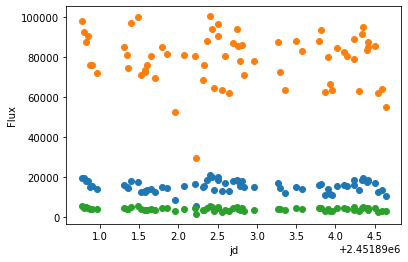

In [59]:
x = time
y = Ceph
y1 = Check_star
y2 = Check_star_1
plt.xlabel('jd')
plt.ylabel('Flux')
Ceph_Flux_vs_Time_Graph = plt.scatter(x, y)
Check_star_vs_Time_Graph = plt.scatter(x, y1)
Check_star_1_vs_Time_Graph = plt.scatter(x, y2)

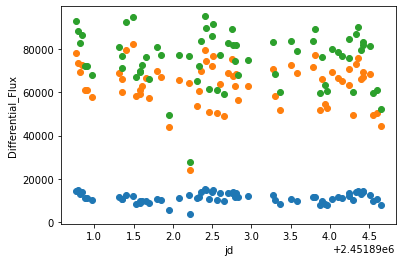

In [60]:
Exp_1 = np.array(Ceph) - np.array(Check_star_1)
Exp_2 = np.array(Check_star) - np.array(Ceph)
Exp_3 = np.array(Check_star) - np.array(Check_star_1)
x = time
y3 = Exp_1
y4 = Exp_2
y5 = Exp_3
plt.xlabel('jd')
plt.ylabel('Differential_Flux')
plt.scatter(x, y3, label = 'Ceph - Check_star_1')
plt.scatter(x, y4, label = 'Check_star - Ceph')
plt.scatter(x, y5, label = 'Check_star - Check_star_1')